
 Test Sonuçları Tablosu:
   Accuracy  Precision    Recall  F1-Score
0  0.946296   0.958203  0.946296  0.945695


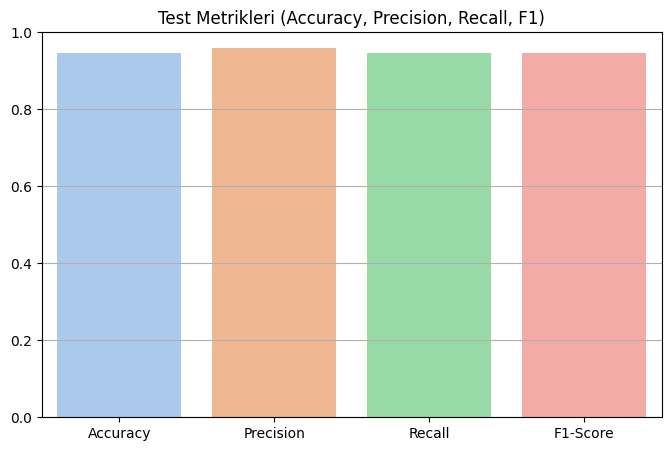

In [4]:
import torch
import timm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


MODEL_PATH = "/content/drive/MyDrive/vit_model/best_model.pt"
TEST_DIR = "/content/data/test"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_ds = datasets.ImageFolder(TEST_DIR, transform=transform)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)
num_classes = len(test_ds.classes)


model = timm.create_model('vit_tiny_patch16_224', pretrained=False, num_classes=num_classes)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.to(device)
model.eval()

y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')


df = pd.DataFrame([{
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}])
print("\n Test Sonuçları Tablosu:")
print(df)

plt.figure(figsize=(8,5))
sns.barplot(data=df, palette="pastel")
plt.title("Test Metrikleri (Accuracy, Precision, Recall, F1)")
plt.ylim(0,1)
plt.grid(True, axis='y')
plt.show()
